# Javier Sayles, Maurice Gleiser, Jamie You-Chen Lin, Chih-Yin Lin
# Group Assignment: Retail Pricing Analysis
### Scenario: You are a team of data analysts working for a large retail company that operates multiple stores. The company has been tracking the prices of various products across its stores. The company is planning to make key pricing decisions based on this data, including identifying the best-selling products, understanding price variations across stores, and recommending pricing strategies for future sales. Your task is to analyze this data and provide insights that will inform the company’s decisions.

### Problem Statement:
Your company currently doesn’t have a clear understanding of how product prices vary between stores and how those prices impact sales. They need your help to analyze this data and provide insights into trends, averages, and pricing strategies.

### Your Task:
1. Plan Your Approach:
As a group, discuss how you would approach this problem. Sketch out the steps (pseudo-code) you would take and the Python code you might write to solve it. You will need to think about the following:

Data:

Imagine what the data would look like. Discuss the variables you are likely to have
You will need to use data structures like lists and dictionaries to organize this information effectively.
Create some sample data that allows you to continue building out your analysis tool.
Calculations:

What calculations would you want to perform on your data?
Control Flow:

You will need to use loops to iterate over your data structures and extract meaningful information (e.g., calculate averages, find maximums and minimums).
You will need to use if conditions to handle different scenarios, such as identifying outliers or applying specific pricing rules.
Summarize and Present Results:

Discuss how you want to summarize the results. Will you present product price ranges, averages, or store rankings?
How would you present this information in a meaningful way for decision-makers? (e.g., printed summaries, simple tables, or even visual plots).
2. Write Your Code:
Write a Python script that carries out the steps in your pseudo-code. Use the following guidelines:
Data Creation: Simulate or create sample data representing product prices and store information.
Metrics Calculation: Write code that performs calculations to summarize product pricing and store performance.
Results Presentation: Output a summary of your findings in a readable format (printed tables, lists, or simple graphs using libraries like plotly or matplotlib.


Deliverables:
A Jupyter Notebook that includes:
Sample data creation using lists and dictionaries.
Pseudo-code and comments detailing your approach.
Code for calculating key metrics (e.g., averages, ranges) and analyzing price trends.
Presentation of results (printed output or visualized).

Pseudocode

Define and implement an EDA

Gather retail data

We are a horror movie paraphernalia store, we sell 4 main line items, and one premium item

<ul>
<li>Ouija Boards</li>
<li>Monster Masks</li>
<li>DVDs</li>
<li>Fake Blood</li>
<li>Real Blood of innocent children</li>


Added to that, we are a seasonal store, our sales spike during halloween.

We run unorganic marketing campaign to target hype in our customers, by offering savings the further away from Halloween they get their items.

The real blood of innocent children is fake blood, but a good and effective marketing strategy, and it helps the local children's Leukemia organizations.

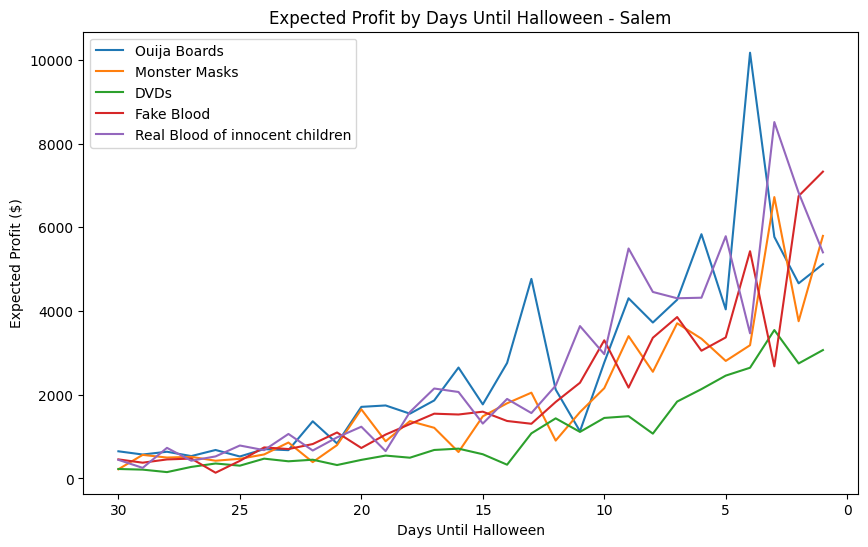

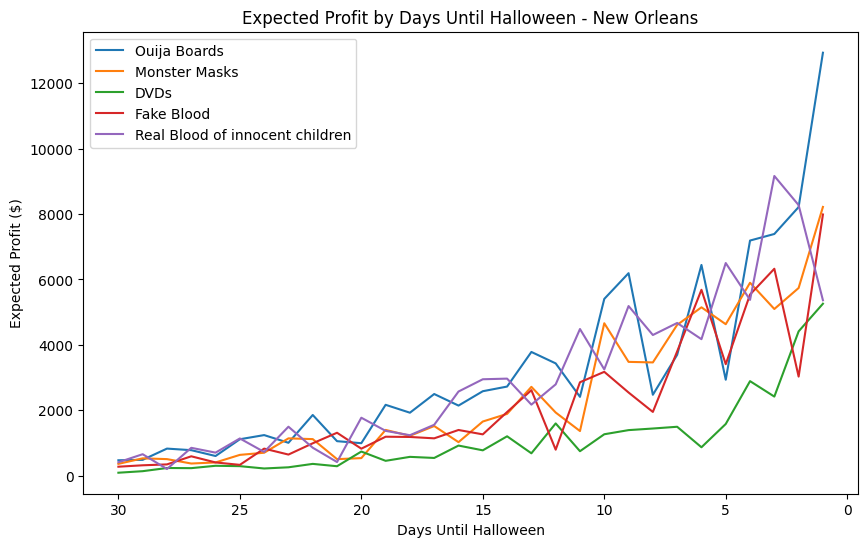

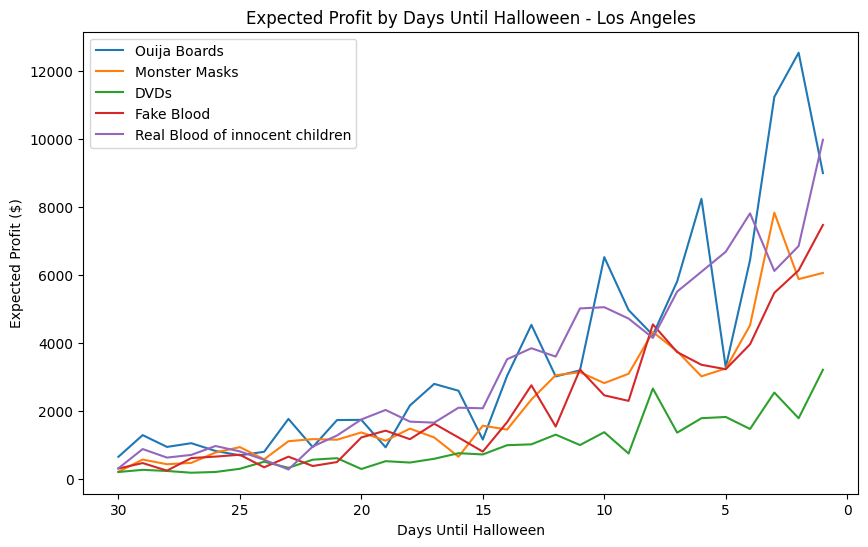

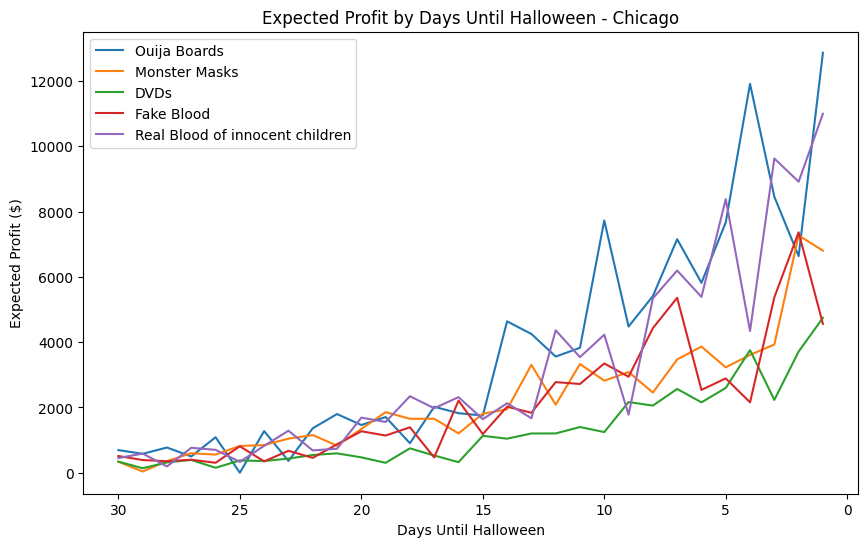

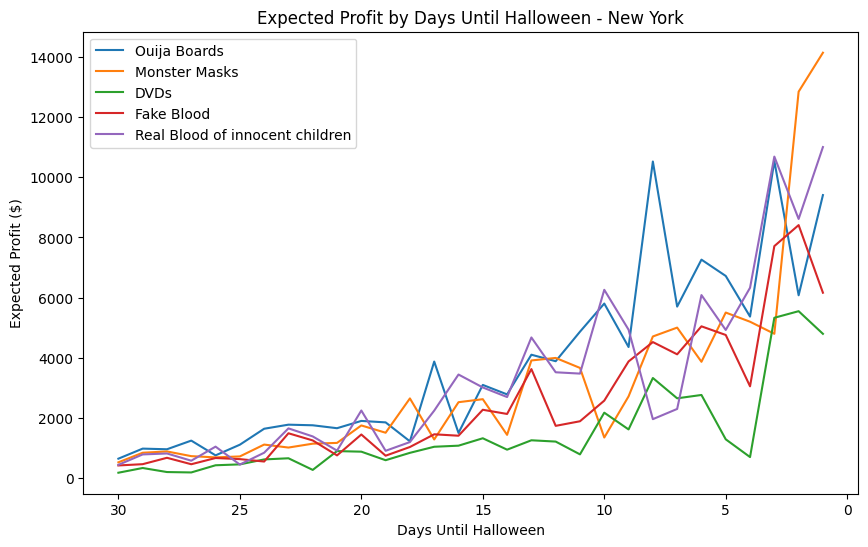

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample product data with base prices and costs
products = {
    201: {"Product Name": "Ouija Boards", "Base Price": 49.99, "Cost": 20},
    202: {"Product Name": "Monster Masks", "Base Price": 29.99, "Cost": 10},
    203: {"Product Name": "DVDs", "Base Price": 14.99, "Cost": 5},
    204: {"Product Name": "Fake Blood", "Base Price": 19.99, "Cost": 2},
    205: {"Product Name": "Real Blood of innocent children", "Base Price": 29.99, "Cost": 5},
}

# Sample store data with price adjustments
stores = {
    1: {"Store Location": "Salem", "Price Adjustment": -0.09},
    2: {"Store Location": "New Orleans", "Price Adjustment": -0.05},
    3: {"Store Location": "Los Angeles", "Price Adjustment": 0.00},
    4: {"Store Location": "Chicago", "Price Adjustment": 0.00},
    5: {"Store Location": "New York", "Price Adjustment": 0.15},
}

# Function to create sales data with exponential growth
def create_sales_data(products, stores, days_until_halloween_range=30):
    sales_data = []
    for store_id, store_info in stores.items():
        for product_id, product_info in products.items():
            adjusted_price = product_info["Base Price"] * (1 + store_info["Price Adjustment"])
            for day in range(1, days_until_halloween_range + 1):
                base_sales_volume = max(0, 20 * np.exp(0.1 * (30 - day)))  # Exponential growth
                sales_volume = base_sales_volume + np.random.normal(0, base_sales_volume * 0.3)
                sales_data.append({
                    "Product ID": product_id,
                    "Product Name": product_info["Product Name"],
                    "Store ID": store_id,
                    "Store Location": store_info["Store Location"],
                    "Price": adjusted_price,
                    "Sales Volume": max(0, sales_volume),
                    "Days Until Halloween": day
                })
    return pd.DataFrame(sales_data)

# Generate sales data
sales_df = create_sales_data(products, stores)

# Calculate expected profit for each product in each store
sales_df["Expected Profit"] = sales_df.apply(
    lambda row: row["Sales Volume"] * (row["Price"] - products[row["Product ID"]]["Cost"]), axis=1
)

# Plot the expected profit over days until Halloween for each store and each product
for store_id, store_info in stores.items():
    store_forecasts = sales_df[sales_df["Store ID"] == store_id]
    plt.figure(figsize=(10, 6))

    for product_id, product_info in products.items():
        product_forecast = store_forecasts[store_forecasts["Product ID"] == product_id]
        plt.plot(product_forecast["Days Until Halloween"], product_forecast["Expected Profit"], label=product_info["Product Name"])

    plt.title(f"Expected Profit by Days Until Halloween - {store_info['Store Location']}")
    plt.xlabel("Days Until Halloween")
    plt.ylabel("Expected Profit ($)")
    plt.gca().invert_xaxis()  # Invert x-axis to show days counting down to Halloween
    plt.legend()
    plt.show()

Best-Selling Product: Ouija Boards with 18555.98 units sold.
Best-Selling Store: Chicago with 18549.79 units sold.
                       Product Name Store Location  Expected Profit
0                              DVDs        Chicago     37450.762696
1                              DVDs    Los Angeles     36016.594114
2                              DVDs    New Orleans     33582.359955
3                              DVDs       New York     44851.521612
4                              DVDs          Salem     32541.195085
5                        Fake Blood        Chicago     30234.195650
6                        Fake Blood    Los Angeles     29448.646243
7                        Fake Blood    New Orleans     27402.280352
8                        Fake Blood       New York     34137.283336
9                        Fake Blood          Salem     26247.201248
10                    Monster Masks        Chicago     72475.206963
11                    Monster Masks    Los Angeles     75310.675317
1

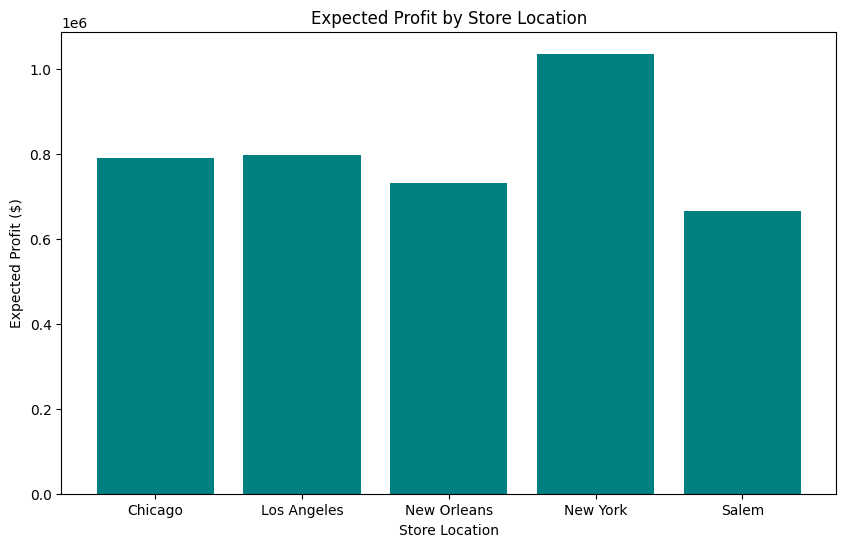

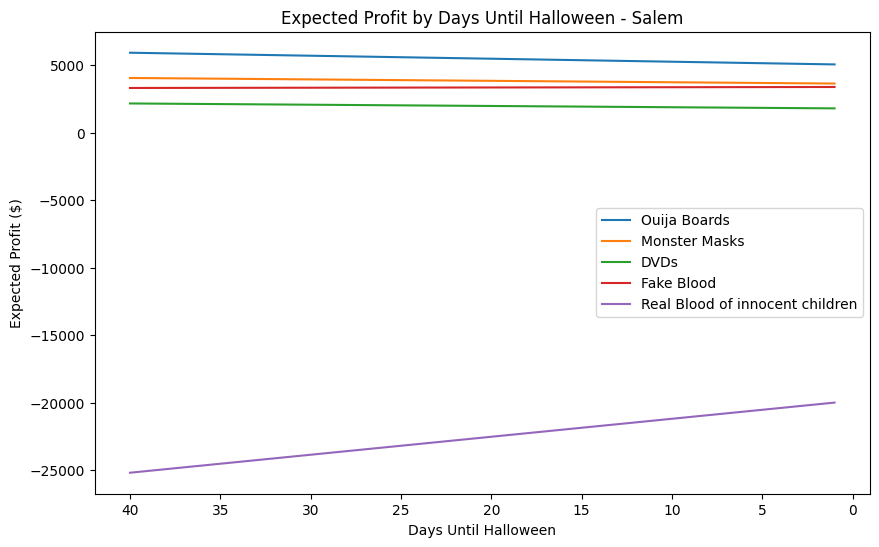

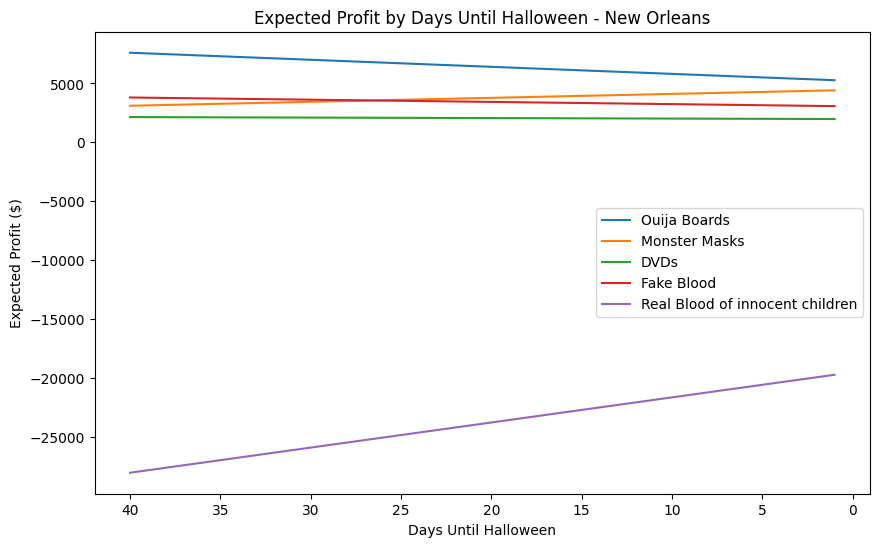

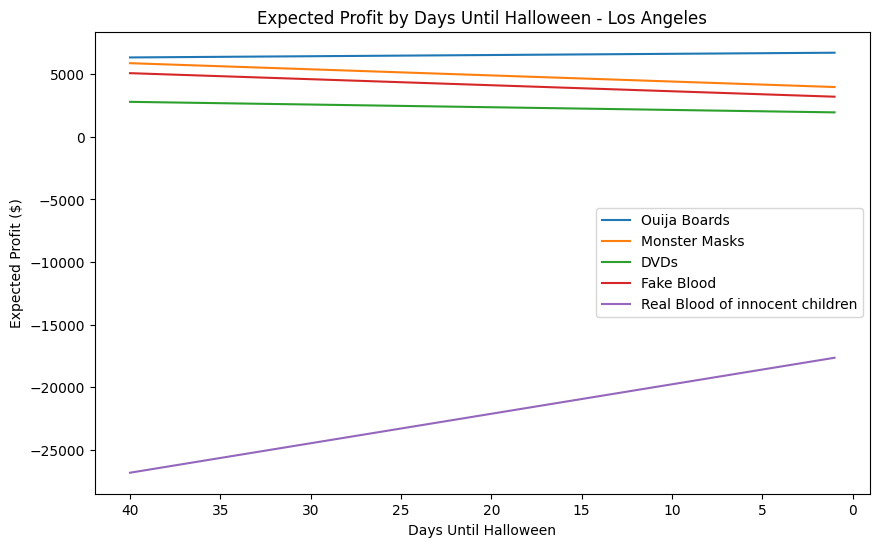

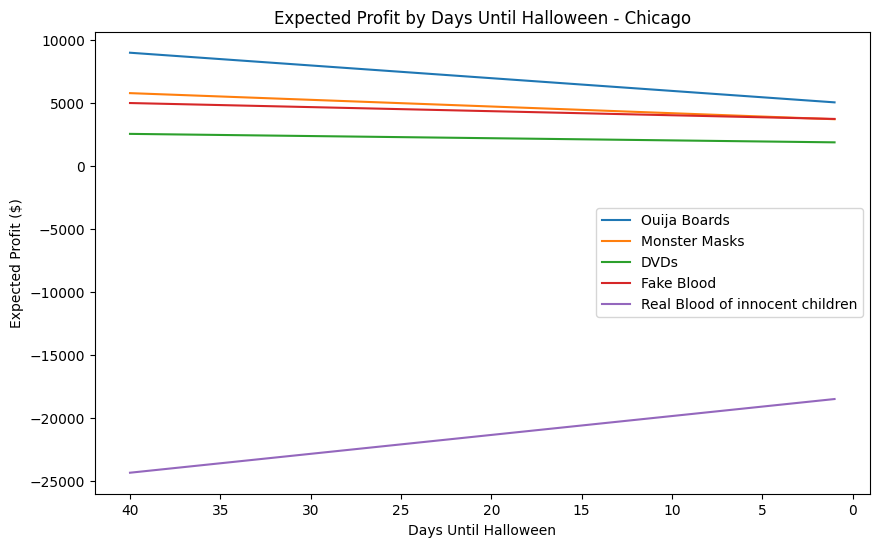

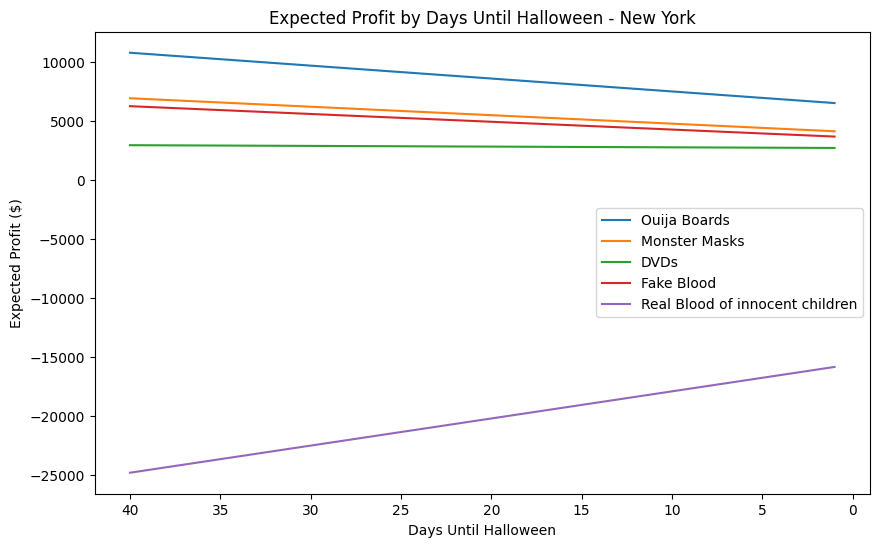